## Importing essential libraries

In [23]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


In [24]:
#TF Version used with Keras.model 
import tensorflow as tf
print(tf.__version__)


2.15.0


## Loading Age/Gender/Emotion Models

In [25]:
export_dir='/home/brandon/IU International University/Project: Edge AI/Models/age_model_acc_0.779.h5'
age_model = load_model(export_dir)

# summarize model.
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (Average  (None, 99, 99, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 48, 48, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 23, 23, 128)       0

In [26]:
# load and evaluate a saved model
export_dir='/home/brandon/IU International University/Project: Edge AI/Models/gender_model.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                             

In [27]:
export_dir='/home/brandon/IU International University/Project: Edge AI/Models/emotion_model.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [28]:
# Labels on Age, Gender and Emotion to be predicted

age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

## Loading Test Images

In [29]:
#Include multiple images to test the model

img_path = "/home/brandon/IU International University/Project: Edge AI/Test/Men/1 (9).png"
img_path2 = "/home/brandon/IU International University/Project: Edge AI/Datasets/Female Faces/0 (3).jpg"
img_path3 = "/home/brandon/IU International University/Project: Edge AI/Datasets/Male Faces/1 (5).jpg"
img_path4 = "/home/brandon/IU International University/Project: Edge AI/Datasets/Female Faces/0 (12).png"

In [30]:
#Load all images
from IPython.display import Image 
pil_images = [Image(filename=img_path), Image(filename=img_path2), Image(filename=img_path3), Image(filename=img_path4)]
display(pil_images)

[<IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>]

## Results on Age/Gender/Emotion

1/1 [==============================] - 0s 101ms/step
/home/brandon/IU International University/Project: Edge AI/Test/Men/1 (9).png: male, 28-45, negative


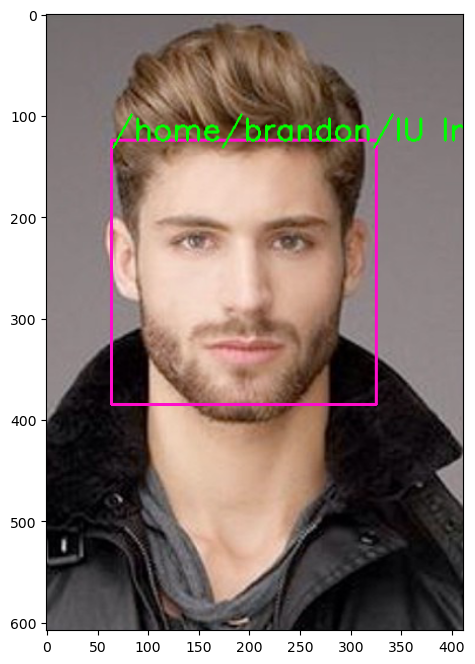

1/1 [==============================] - 0s 33ms/step
/home/brandon/IU International University/Project: Edge AI/Datasets/Female Faces/0 (3).jpg: female, 10-20, positive


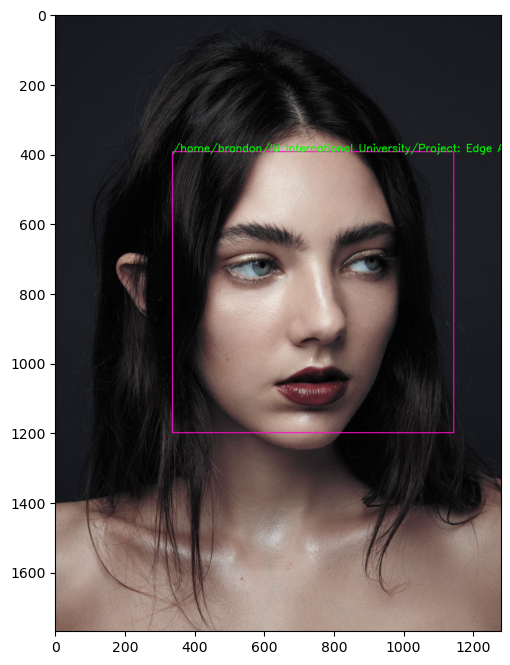

1/1 [==============================] - 0s 34ms/step
/home/brandon/IU International University/Project: Edge AI/Datasets/Male Faces/1 (5).jpg: male, 21-27, negative


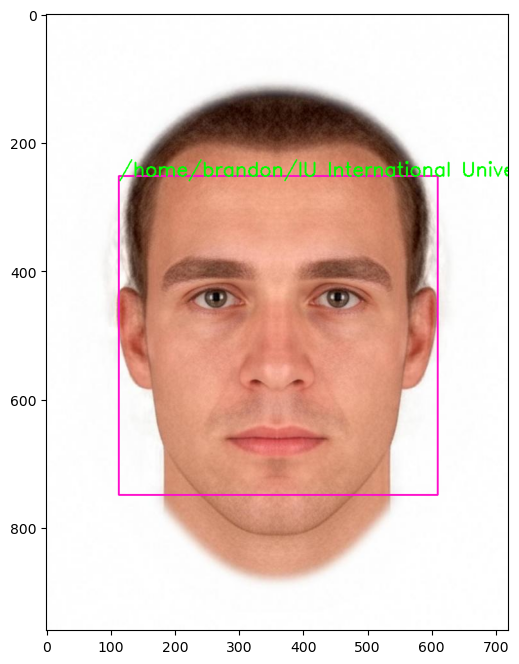

1/1 [==============================] - 0s 34ms/step
/home/brandon/IU International University/Project: Edge AI/Datasets/Female Faces/0 (12).png: female, 21-27, negative


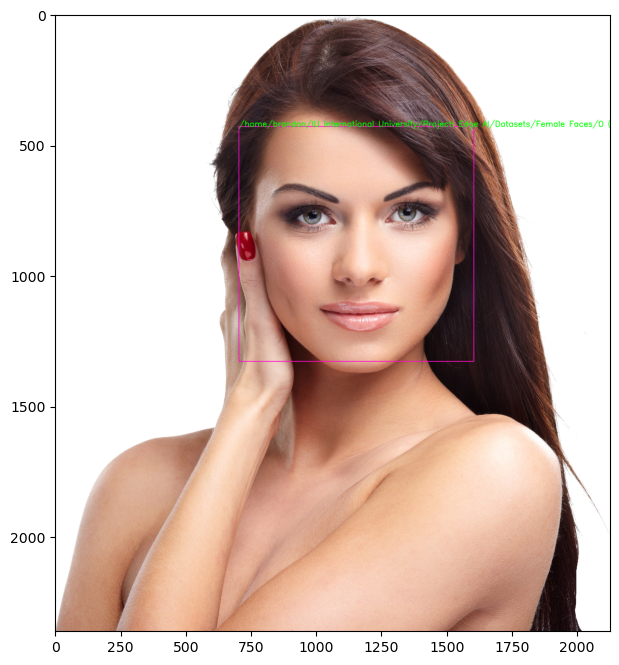

In [31]:
# List of image paths
img_paths = [
    img_path,
    img_path2,
    img_path3,
    img_path4       
] 

# Iterate over each image path
for img_path in img_paths:
    # Read the current image
    test_image = cv2.imread(img_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Process each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(test_image, (x, y), (x+w, y+h), (203, 12, 255), 2)

        # Extract region of interest (ROI) for emotion analysis
        img_gray = gray[y:y+h, x:x+w]
        emotion_img = cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_AREA)
        emotion_image_array = np.array(emotion_img)
        emotion_input = np.expand_dims(emotion_image_array, axis=0)
        output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

        # Extract ROI for gender analysis
        gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)
        gender_image_array = np.array(gender_img)
        gender_input = np.expand_dims(gender_image_array, axis=0)
        output_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

        # Extract ROI for age analysis
        age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
        age_input = age_image.reshape(-1, 200, 200, 1)
        output_age = age_ranges[np.argmax(age_model.predict(age_input))]

        # Display the analysis results
        output_str = f"{img_path}: {output_gender}, {output_age}, {output_emotion}"
        print(output_str)

        # Draw text on the image
        col = (0, 255, 0)
        cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

    # Display the image with annotations
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.show()


In [36]:

test_data = [
    ("/home/brandon/IU International University/Project: Edge AI/Datasets/Female Faces/0 (18).png", "male", "28-45", "neutral"),
    ("/home/brandon/IU International University/Project: Edge AI/Datasets/Male Faces/1 (19).jpg", "male", "46-65", "negative"),
    ("/home/brandon/IU International University/Project: Edge AI/Datasets/Female Faces/0 (31).png", "female", "10-20", "neutral"),
    # Add more test data as needed
]


# Function to predict labels using the loaded models
def predict_labels(image_path, age_model, gender_model, emotion_model):
    # Read image
    test_image = cv2.imread(image_path)
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    predictions = []
    
    for (x, y, w, h) in faces:
        img_gray = gray[y:y+h, x:x+w]

        # Predict age
        age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
        age_input = age_image.reshape(-1, 200, 200, 1)
        predicted_age = age_ranges[np.argmax(age_model.predict(age_input))]

        # Predict gender
        gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)
        gender_image_array = np.array(gender_img)
        gender_input = np.expand_dims(gender_image_array, axis=0)
        predicted_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

        # Predict emotion
        emotion_img = cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_AREA)
        emotion_image_array = np.array(emotion_img)
        emotion_input = np.expand_dims(emotion_image_array, axis=0)
        predicted_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

        predictions.append((predicted_gender, predicted_age, predicted_emotion))

    return predictions

# Function to calculate accuracy
def calculate_accuracy(predictions, test_data):
    correct = 0
    total = len(test_data)

    for i, (image_path, true_gender, true_age, true_emotion) in enumerate(test_data):
        predicted_gender, predicted_age, predicted_emotion = predictions[i]
        if predicted_gender == true_gender and predicted_age == true_age and predicted_emotion == true_emotion:
            correct += 1

    accuracy = correct / total
    return accuracy

# Perform predictions for all test images
all_predictions = []
for image_path, _, _, _ in test_data:
    predictions = predict_labels(image_path, age_model, gender_model, emotion_model)
    all_predictions.extend(predictions)

# Calculate accuracy
accuracy = calculate_accuracy(all_predictions, test_data)
print(f"Overall accuracy: {accuracy * 100:.2f}%")



1/1 [==============================] - 0s 24ms/step
Overall accuracy: 0.00%


In [32]:
import tensorflow as tf

def reload_and_convert_model(original_model_path, model_name):
    # Load and immediately save the model to standardize its format, excluding the optimizer
    model = tf.keras.models.load_model(original_model_path)
    standardized_model_path = f'/home/brandon/IU International University/Project: Edge AI/{model_name}_standardized.h5'
    model.save(standardized_model_path, include_optimizer=False)

    # Path for the SavedModel format
    saved_model_path = f'/home/brandon/IU International University/Project: Edge AI/{model_name}_SavedModel'

    # Save the model in the SavedModel format, excluding the optimizer
    model = tf.keras.models.load_model(standardized_model_path)
    model.save(saved_model_path, save_format='tf', include_optimizer=False)

    # Convert the model to TensorFlow Lite with custom ops allowed
    converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
    converter.allow_custom_ops = True
    tflite_model = converter.convert()

    # Save the converted model
    tflite_model_path = f'/home/brandon/IU International University/Project: Edge AI/{model_name}.tflite'
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Converted and saved {model_name} model to TFLite format with custom ops.")

# Convert and save each model
age_model_path = '/home/brandon/IU International University/Project: Edge AI/Models/age_model_acc_0.779.h5'
reload_and_convert_model(age_model_path, 'age_model')
reload_and_convert_model('/home/brandon/IU International University/Project: Edge AI/Models/gender_model.h5', 'gender_model')
reload_and_convert_model('/home/brandon/IU International University/Project: Edge AI/Models/emotion_model.h5', 'emotion_model')







/home/brandon/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/brandon/IU International University/Project: Edge AI/age_model_SavedModel/assets


INFO:tensorflow:Assets written to: /home/brandon/IU International University/Project: Edge AI/age_model_SavedModel/assets
2024-03-20 15:50:10.834210: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-20 15:50:10.834248: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-20 15:50:10.834476: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /home/brandon/IU International University/Project: Edge AI/age_model_SavedModel
2024-03-20 15:50:10.835863: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-20 15:50:10.835875: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /home/brandon/IU International University/Project: Edge AI/age_model_SavedModel
2024-03-20 15:50:10.838635: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-20 15:50:10.867611: I tensor

Converted and saved age_model model to TFLite format with custom ops.


/home/brandon/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/brandon/IU International University/Project: Edge AI/gender_model_SavedModel/assets


INFO:tensorflow:Assets written to: /home/brandon/IU International University/Project: Edge AI/gender_model_SavedModel/assets
2024-03-20 15:50:13.568997: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-20 15:50:13.569052: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-20 15:50:13.569443: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /home/brandon/IU International University/Project: Edge AI/gender_model_SavedModel
2024-03-20 15:50:13.571900: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-20 15:50:13.571945: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /home/brandon/IU International University/Project: Edge AI/gender_model_SavedModel
2024-03-20 15:50:13.576207: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-20 15:50:13.614164:

Converted and saved gender_model model to TFLite format with custom ops.


/home/brandon/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/brandon/IU International University/Project: Edge AI/emotion_model_SavedModel/assets


INFO:tensorflow:Assets written to: /home/brandon/IU International University/Project: Edge AI/emotion_model_SavedModel/assets


Converted and saved emotion_model model to TFLite format with custom ops.


2024-03-20 15:50:16.704978: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-20 15:50:16.705019: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-20 15:50:16.705258: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /home/brandon/IU International University/Project: Edge AI/emotion_model_SavedModel
2024-03-20 15:50:16.707603: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-20 15:50:16.707619: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /home/brandon/IU International University/Project: Edge AI/emotion_model_SavedModel
2024-03-20 15:50:16.711710: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-20 15:50:16.745151: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /home/brandon/IU Intern